<a href="https://colab.research.google.com/github/Yashsethi24/Regression-diamond-prices/blob/main/End_to_End_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 – End-to-end Machine Learning project**

This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Get the Data

*Welcome to Machine Learning Diamond Corp.! Your task is to predict price of diamnonds, a number of features of these diamonds.*

In [12]:
import pandas as pd
data = pd.read_csv('/content/diamonds.csv')

In [13]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
# Rename columns
data.rename(columns={'depth':'depth_perc','x': 'length', 'y': 'width', 'z': 'depth'}, inplace=True)

In [16]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_perc', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

## Take a Quick Look at the Data Structure

In [17]:
data.head()

,carat,cut,color,clarity,depth_perc,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Description of columns


*   price - price in US dollars
*   carat - weight of the diamond
*   cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color - diamond colour, from J (worst) to D (best)
*   clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*   length - length (in mm)
*   width - width (in mm)
*   depth - depth (in mm)
*   depth_perc - total depth percentage {z / mean(x, y) = 2 * z / (x + y)}
*   table - width of top of diamond relative to widest point

# Look at the data types and null values in data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53940 non-null  float64
 1   cut         53940 non-null  object 
 2   color       53940 non-null  object 
 3   clarity     53940 non-null  object 
 4   depth_perc  53940 non-null  float64
 5   table       53940 non-null  float64
 6   price       53940 non-null  int64  
 7   length      53940 non-null  float64
 8   width       53940 non-null  float64
 9   depth       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### ***Observation:*** No column has null value and we have three object columns.

# Look at the value counts for each 'object' column

In [19]:
data["cut"].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [20]:
data["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [21]:
data["clarity"].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


# Distribution of values in non-object columns

In [22]:
data.describe()

,carat,depth_perc,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Code to save the figures as high-res PNGs for the book

In [24]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

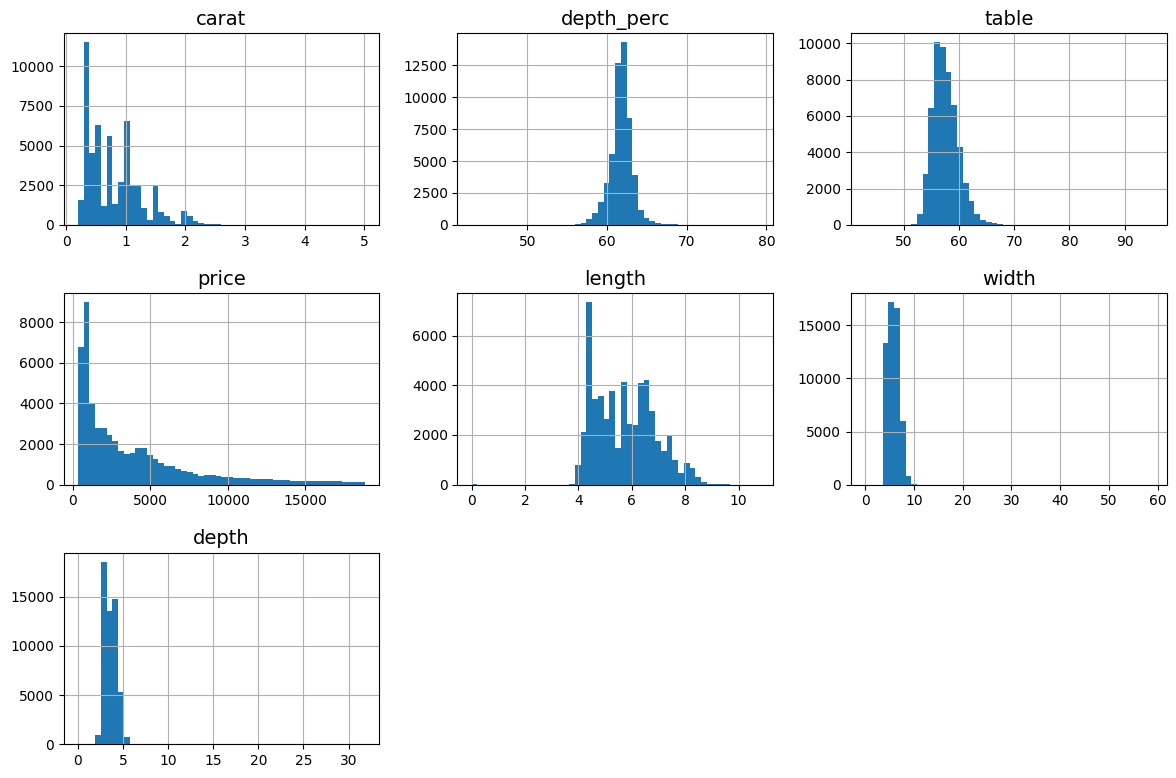

In [25]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

#### Approach-1 : Simple Shuffle and Split

In [26]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [28]:
train_set, test_set = shuffle_and_split_data(data, 0.2)
print("training dataset size:",len(train_set))
print("testing dataset size:",len(test_set))

training dataset size: 43152
testing dataset size: 10788


To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [29]:
np.random.seed(42)

#### Approach-2: Splitting using hash-seed to remove randomness when the kernel restarts

In [30]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [31]:
data_with_id = data.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(data_with_id, 0.2, "index")

In [34]:
# data_with_id["id"] = data_with_id["carat"] * 1000 + data_with_id["depth"]

Approach-3: Splitting using sklearn library

In [38]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)